In [37]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# loading encoded.csv 
auto_data_encoded = pd.read_csv('auto_data_encoded.csv')

In [38]:
auto_data_encoded

,Unnamed: 0,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,...,False,False,False,False,False,False,False,False,False,False
1,1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,...,False,False,False,False,False,False,False,False,False,False
2,2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,152,...,False,False,False,False,False,False,False,False,False,False
3,3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,109,...,False,False,False,False,False,False,False,False,False,False
4,4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,136,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,141,...,False,False,False,False,False,False,False,False,False,True
197,201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,141,...,False,False,False,False,False,False,False,False,False,True
198,202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,173,...,False,False,False,False,False,False,False,False,False,True
199,203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,145,...,False,False,False,False,False,False,False,False,False,True


In [39]:
auto_data_encoded = auto_data_encoded.drop('Unnamed: 0',axis=1)

In [40]:
# Separate the target variable 'price' and features
X = auto_data_encoded.drop('price', axis=1)
y = auto_data_encoded['price']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame (optional for visualization)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()


,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,-0.542288,-0.652249,-0.248239,0.206174,-0.291435,-1.831820,0.522405,0.075389,-0.343660,-0.014858,...,-0.313625,-0.240613,-0.189954,-0.142494,-0.100251,-0.175412,-0.251976,-0.435143,-0.251976,-0.240613
1,-0.542288,-0.652249,-0.248239,0.206174,-0.291435,-1.831820,0.522405,0.075389,-0.343660,-0.014858,...,-0.313625,-0.240613,-0.189954,-0.142494,-0.100251,-0.175412,-0.251976,-0.435143,-0.251976,-0.240613
2,-0.689386,-0.964397,-0.248239,1.359551,-0.291435,0.673776,-2.431752,0.606234,1.548823,0.518080,...,-0.313625,-0.240613,-0.189954,-0.142494,-0.100251,-0.175412,-0.251976,-0.435143,-0.251976,-0.240613
3,-0.100993,-0.184027,0.799996,-0.035230,-0.041121,0.451761,-0.524638,-0.431327,-0.343660,-0.423766,...,-0.313625,-0.240613,-0.189954,-0.142494,-0.100251,-0.175412,-0.251976,-0.435143,-0.251976,-0.240613
4,-1.277779,-1.120471,0.799996,0.313465,-0.541748,0.451761,-0.524638,0.220165,0.602582,0.520017,...,-0.313625,-0.240613,-0.189954,-0.142494,-0.100251,-0.175412,-0.251976,-0.435143,-0.251976,-0.240613


In [43]:


# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determining the number of components to explain 95% of variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

cumulative_variance_ratio, n_components_95


(array([0.18274771, 0.28125633, 0.3376468 , 0.39137034, 0.44334899,
        0.48302371, 0.52022161, 0.55078673, 0.58060809, 0.60863394,
        0.63613309, 0.66034882, 0.68202981, 0.70294281, 0.72344158,
        0.74308358, 0.76241428, 0.77959166, 0.79623331, 0.81205116,
        0.82726096, 0.84185682, 0.855986  , 0.8695322 , 0.88248904,
        0.89399812, 0.90534882, 0.91541708, 0.92486928, 0.93363729,
        0.94197258, 0.9487763 , 0.95525338, 0.9602866 , 0.96486933,
        0.96923984, 0.97308917, 0.9765003 , 0.97958369, 0.98240936,
        0.98478017, 0.98702477, 0.98895718, 0.99064347, 0.9921777 ,
        0.9936107 , 0.99494484, 0.9959989 , 0.9967661 , 0.99753243,
        0.99812262, 0.9986668 , 0.99906941, 0.99941209, 0.99966518,
        0.99983341, 0.99991845, 0.99997411, 0.99998928, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]),
 33)

In [44]:
# Splitting the original scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Splitting the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca = train_test_split(X_pca[:, :n_components_95], test_size=0.2, random_state=42)

# Initializing models
linear_model = LinearRegression()
ridge_model = Ridge()

# Training and evaluating models with original features
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
linear_r2 = r2_score(y_test, linear_predictions)

ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
ridge_r2 = r2_score(y_test, ridge_predictions)

# Training and evaluating models with PCA features
linear_model.fit(X_train_pca, y_train)
linear_pca_predictions = linear_model.predict(X_test_pca)
linear_pca_rmse = mean_squared_error(y_test, linear_pca_predictions, squared=False)
linear_pca_r2 = r2_score(y_test, linear_pca_predictions)

ridge_model.fit(X_train_pca, y_train)
ridge_pca_predictions = ridge_model.predict(X_test_pca)
ridge_pca_rmse = mean_squared_error(y_test, ridge_pca_predictions, squared=False)
ridge_pca_r2 = r2_score(y_test, ridge_pca_predictions)

# Results
results = {
    "Linear Regression": {"RMSE": linear_rmse, "R2": linear_r2},
    "Ridge Regression": {"RMSE": ridge_rmse, "R2": ridge_r2},
    "Linear Regression with PCA": {"RMSE": linear_pca_rmse, "R2": linear_pca_r2},
    "Ridge Regression with PCA": {"RMSE": ridge_pca_rmse, "R2": ridge_pca_r2}
}

results


{'Linear Regression': {'RMSE': 2628.314052931367, 'R2': 0.9435372540952293},
 'Ridge Regression': {'RMSE': 2651.2035059706013, 'R2': 0.9425495266203687},
 'Linear Regression with PCA': {'RMSE': 3165.044188439928,
  'R2': 0.9181220357319357},
 'Ridge Regression with PCA': {'RMSE': 3171.130584786848,
  'R2': 0.9178068294537354}}

Top features for Linear Regression:
combined_mpg           2.140538e+16
highway-mpg            1.323358e+16
city-mpg               8.315027e+15
engine_size_squared    8.517500e+03
engine-size            4.656000e+03
dtype: float64


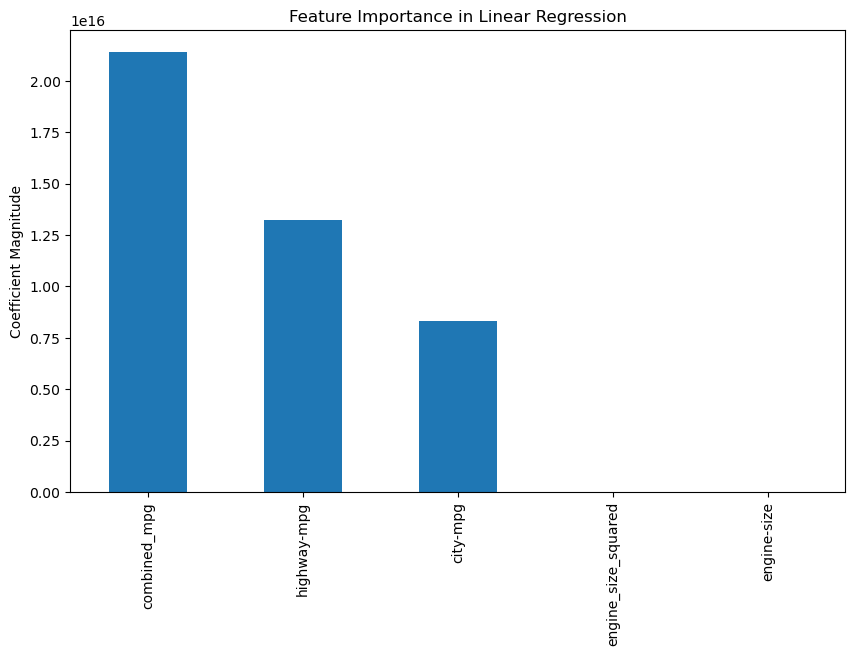

       combined_mpg  highway-mpg    city-mpg  engine_size_squared  engine-size
count    201.000000   201.000000  201.000000           201.000000   201.000000
mean      28.483582    30.686567   25.179104         17814.975124   126.875622
std        6.614120     6.815150    6.423220         14289.817457    41.546834
min       15.200000    16.000000   13.000000          3721.000000    61.000000
25%       23.000000    25.000000   19.000000          9604.000000    98.000000
50%       27.600000    30.000000   24.000000         14400.000000   120.000000
75%       32.400000    34.000000   30.000000         19881.000000   141.000000
max       52.000000    54.000000   49.000000        106276.000000   326.000000
Top features for Ridge Regression:
engine_size_squared    3539.236971
curb-weight            3038.461391
compression-ratio      1838.720284
make_bmw               1762.121691
make_peugot            1600.618528
dtype: float64


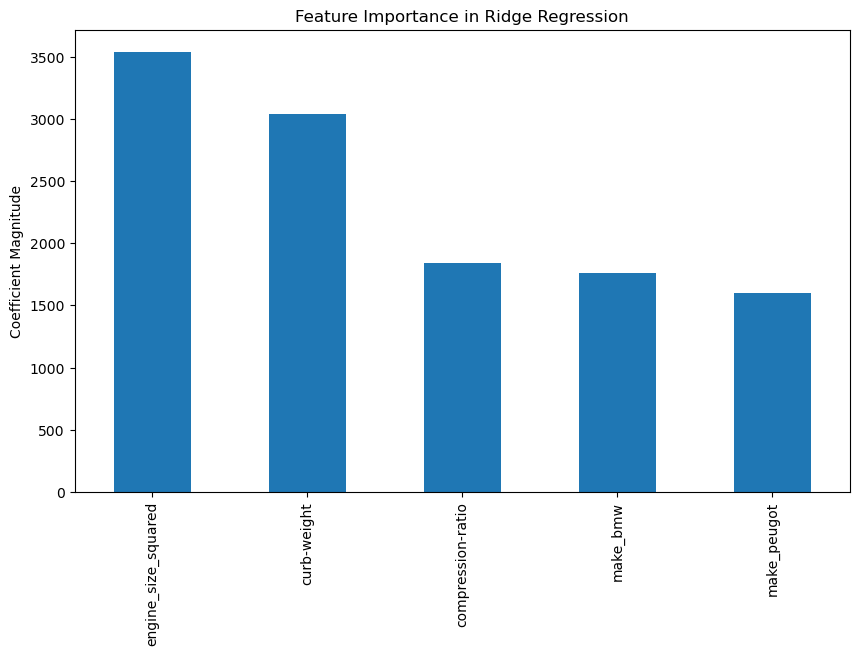

       engine_size_squared  curb-weight  compression-ratio
count           201.000000   201.000000         201.000000
mean          17814.975124  2555.666667          10.164279
std           14289.817457   517.296727           4.004965
min            3721.000000  1488.000000           7.000000
25%            9604.000000  2169.000000           8.600000
50%           14400.000000  2414.000000           9.000000
75%           19881.000000  2926.000000           9.400000
max          106276.000000  4066.000000          23.000000


In [55]:
# Fit the models on the original scaled data (without PCA)
linear_model = LinearRegression().fit(X_scaled, y)
ridge_model = Ridge().fit(X_scaled, y)

# Extract coefficients
linear_coefs = pd.Series(linear_model.coef_, index=X.columns)
ridge_coefs = pd.Series(ridge_model.coef_, index=X.columns)

# Identify top features from each model
top_features_linear = linear_coefs.abs().sort_values(ascending=False).head(5)
top_features_ridge = ridge_coefs.abs().sort_values(ascending=False).head(5)

# Visualization and Statistics
for model_name, top_features in zip(['Linear Regression', 'Ridge Regression'], [top_features_linear, top_features_ridge]):
    print(f"Top features for {model_name}:")
    print(top_features)
    
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='bar')
    plt.title(f'Feature Importance in {model_name}')
    plt.ylabel('Coefficient Magnitude')
    plt.show()

    # Statistics of top features
    print(auto_data[top_features.index].describe())
